In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [3]:
# Customize the default plotting style
plt.rcParams['figure.figsize'] = (8, 6)  # Set the default figure size
plt.rcParams['axes.labelsize'] = 14      # Set the default label font size
plt.rcParams['axes.titlesize'] = 16      # Set the default title font size
plt.rcParams['xtick.labelsize'] = 12     # Set the default x-axis tick font size
plt.rcParams['ytick.labelsize'] = 12     # Set the default y-axis tick font size
plt.rcParams['lines.linewidth'] = 2.0    # Set the default line width
plt.rcParams['lines.markersize'] = 8     # Set the default marker size
plt.rcParams['legend.fontsize'] = 12     # Set the default legend font size
plt.rcParams['axes.grid'] = True         # Enable grid lines by default

# Now, all subsequent plots in your script will use these settings


In [5]:
# df_01_20 = pd.read_csv('data/NYA_cont-meteorology_2011-08_etseq/datasets/NYA_cont_meteorology_2020-01.tab', sep='\t', skiprows= range(22))
# df_02_20 = pd.read_csv('data/NYA_cont-meteorology_2011-08_etseq/datasets/NYA_cont_meteorology_2020-02.tab', sep='\t', skiprows= range(22))
# df_03_20 = pd.read_csv('data/NYA_cont-meteorology_2011-08_etseq/datasets/NYA_cont_meteorology_2020-03.tab', sep='\t', skiprows= range(22))
# df_04_20 = pd.read_csv('data/NYA_cont-meteorology_2011-08_etseq/datasets/NYA_cont_meteorology_2020-04.tab', sep='\t', skiprows= range(22))
# df_05_20 = pd.read_csv('data/NYA_cont-meteorology_2011-08_etseq/datasets/NYA_cont_meteorology_2020-05.tab', sep='\t', skiprows= range(22))
# df_06_20 = pd.read_csv('data/NYA_cont-meteorology_2011-08_etseq/datasets/NYA_cont_meteorology_2020-06.tab', sep='\t', skiprows= range(22))

# Basisverzeichnis für die Daten
data_dir = 'data/NYA_cont-meteorology_2011-08_etseq/datasets/'

# Erstellen Sie eine leere Liste, um DataFrames zu speichern
years = []



# Schleife für die Monate
for year in range(12,23):
#for year in range(1,23):
    dataframes = []
    for month in range(1, 13):
        # Erzeugen des Dateinamens
        file_name = f'NYA_cont_meteorology_20{year:02d}-{month:02d}.tab'

        # Lesen der CSV-Datei für den aktuellen Monat
        df = pd.read_csv(data_dir + file_name, sep='\t')
        df['Date/Time'] = pd.to_datetime(df['Date/Time'])
        print('Zahlen der NaN-Einträge: '+str(np.sum(np.isnan(df['T2 [°C] (average, Thermometer)']))))
        df.loc[np.isnan(df['T2 [°C] (average, Thermometer)']),'T2 [°C] (average, Thermometer)'] = np.mean(df['T2 [°C] (average, Thermometer)'])

        # Fügen Sie den DataFrame zur Liste hinzu
        dataframes.append(df)
    years.append(dataframes.copy())

# for month in range(7, 13):
#     # Erzeugen des Dateinamens
#     file_name = f'NYA_cont_meteorology_2019-{month:02d}.tab'
    
#     # Lesen der CSV-Datei für den aktuellen Monat
#     df = pd.read_csv(data_dir + file_name, sep='\t', skiprows=range(22))
#     df['Date/Time'] = pd.to_datetime(df['Date/Time'])
#     print('Zahlen der NaN-Einträge: '+str(np.sum(np.isnan(df['T2 [°C] (average, Thermometer)']))))
#     df.loc[np.isnan(df['T2 [°C] (average, Thermometer)']),'T2 [°C] (average, Thermometer)'] = 0

#     # Fügen Sie den DataFrame zur Liste hinzu
#     dataframes.append(df)



years
# df_12_09['Date/Time'] = pd.to_datetime(df_12_09['Date/Time'])
# NaNEntries = np.sum(np.isnan(df_12_09['T2 [°C] (average, Thermometer)']))
# df_12_09.loc[np.isnan(df_12_09['T2 [°C] (average, Thermometer)']),'T2 [°C] (average, Thermometer)'] = 0
# #print(df_12_09['T2 [°C] (average, Thermometer)'])
# print(np.sum(np.isnan(df_12_09['T2 [°C] (average, Thermometer)'])))
# df_12_09

FileNotFoundError: [Errno 2] No such file or directory: 'data/NYA_cont-meteorology_2011-08_etseq/datasets/NYA_cont_meteorology_2001-01.tab'

(array([15826., 15830., 15834., 15838., 15842., 15846., 15850., 15854.,
        15857.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

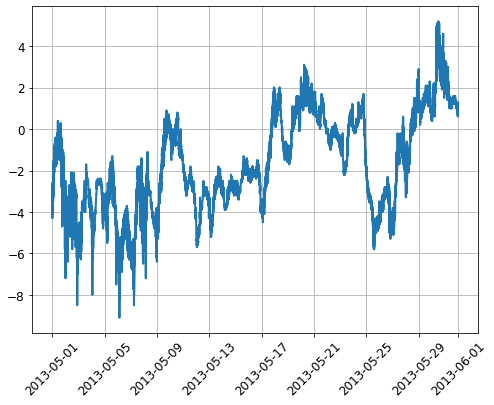

In [ ]:
len(years)
plt.plot(years[1][4]['Date/Time'],years[1][4]['T2 [°C] (average, Thermometer)'])
plt.xticks(rotation = 45)
#plt.xlim(pd.to_datetime('2013-05-13'), pd.to_datetime('2013-05-21'))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.11234948970847823,
 0.08052633305263414,
 0.15290012920989346,
 0.3770825018265356,
 0.2894508885328411,
 0.22775410766178056,
 0.309369751795075,
 0.3513655319047053,
 0.22732433894039109,
 0.07640692942272946,
 0.10245760077224202,
 0.07192019825942438]

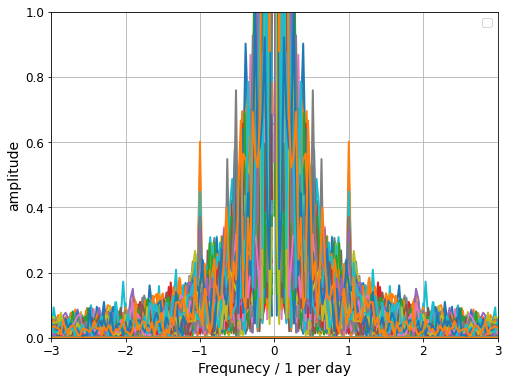

In [ ]:
tagesgang_grad_mean = []

for i in range(0,12):
    tagesgang_grad = []
    for y in range(len(years)):
                   
        data = years[y][i]['T2 [°C] (average, Thermometer)'] #- np.mean(dataframes[i]['T2 [°C] (average, Thermometer)'])

        fft = np.fft.fft(data)
        t = np.arange(len(data))
        freq = np.fft.fftfreq(t.shape[-1], d = 1/(60*24))
        #print(len(data))
        amplitude = 1/ len(data) * np.abs(fft)
        temp_index = np.where(freq == find_nearest(freq, 1))
        tagesgang_grad.append(amplitude[temp_index])

        plt.plot(freq, amplitude)
        # print(NaNEntries)
        plt.xlim(-3,3)
        plt.ylim(0,1)
        #plt.show()
    #plt.plot(tagesgang_grad, label = str(i))
    tagesgang_grad_mean.append(np.mean(tagesgang_grad))


plt.xlabel('Frequnecy / 1 per day')
plt.ylabel('amplitude')
plt.legend()
tagesgang_grad_mean


In [ ]:
# # Define the window function (e.g., Hanning window)
# def window_function(length):
#     return np.hanning(length)  # You can choose other window functions as needed

# tagesgang_grad = []
# tagesgang_grad_mean = []

# for i in range(0,12):
#     tagesgang_grad = []
#     for y in range(len(years)):
                   
#          # Zero padding: Extend the length of data to the desired length
#         desired_length = 10000000  # Adjust this to the desired length
#         # data_padded = np.pad(data, (0, desired_length - len(data)), 'constant')

#         # Apply windowing function
#         window_length = len(data)  # You can adjust this as needed
#         window = window_function(window_length)
#         data_windowed = data * window
#         data_padded = np.pad(data, (0, desired_length - len(data)), 'constant')
#         # fft_original = np.fft.fft(data)
#         fft_padded = np.fft.fft(data_padded)

#         # t = np.arange(len(data))
#         # freq = np.fft.fftfreq(t.shape[-1], d=1 / (60 * 24))

#         t2 =  np.arange(len(data_padded))
#         freq2 = np.fft.fftfreq(t2.shape[-1], d=1 / (60 * 24))
        
#         # amplitude_original = 1 / len(data) * np.abs(fft_original)
#         amplitude_padded = 1 / len(data) * np.abs(fft_padded)
#         # amplitude_padded = 1 / len(data_padded) * np.abs(fft_padded)


#         temp_index = np.where(freq2 == find_nearest(freq2, 1))
#         tagesgang_grad.append(amplitude_padded[temp_index])
#     tagesgang_grad_mean.append(np.mean(tagesgang_grad))

# plt.xlabel('Frequnecy / 1 per day')
# plt.ylabel('amplitude')
# plt.legend()
# tagesgang_grad_mean


In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Define the window function (e.g., Hanning window)
# def window_function(length):
#     return np.hanning(length)  # You can choose other window functions as needed

# tagesgang_grad = []

# for i in range(0, 12):
#     data = dataframes[i]['T2 [°C] (average, Thermometer)']

#     # Zero padding: Extend the length of data to the desired length
#     desired_length = 10000000  # Adjust this to the desired length
#     data_padded = np.pad(data, (0, desired_length - len(data)), 'constant')

#     # Apply windowing function
#     window_length = len(data)  # You can adjust this as needed
#     window = window_function(window_length)
#     data_windowed = data * window

#     fft_original = np.fft.fft(data)
#     fft_padded = np.fft.fft(data_padded)

#     t = np.arange(len(data))
#     freq = np.fft.fftfreq(t.shape[-1], d=1 / (60 * 24))

#     t2 =  np.arange(len(data_padded))
#     freq2 = np.fft.fftfreq(t2.shape[-1], d=1 / (60 * 24))
    
#     amplitude_original = 1 / len(data) * np.abs(fft_original)
#     amplitude_padded = 1 / len(data) * np.abs(fft_padded)
#     # amplitude_padded = 1 / len(data_padded) * np.abs(fft_padded)


#     temp_index = np.where(freq2 == find_nearest(freq2, 1))
#     tagesgang_grad.append(amplitude_padded[temp_index])

#     #plt.plot(freq[:len(freq)//2], amplitude_original[:len(freq)//2], ls = '--', label='Original Signal')
#     plt.plot(freq2, amplitude_padded, label='Padded and Windowed Signal')
#     #plt.legend()


# plt.xlim(0, 2)
# plt.ylim(0, 1)

# plt.xlabel('Frequency / 1/day')
# plt.ylabel('Amplitude')  # Add a label for the y-axis
# plt.show()


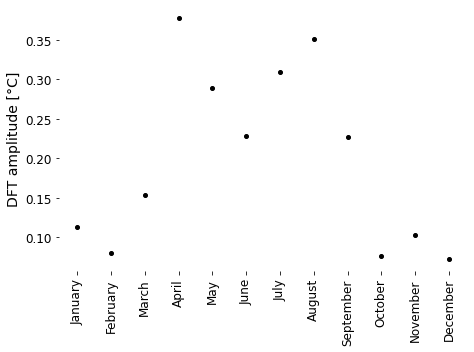

In [ ]:
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


fig1, ax1 = plt.subplots(figsize=(17 / 2.54, 5))

# Plot the data for the first plot
#ax1.set_xlabel('Month')
ax1.set_ylabel('DFT amplitude [°C]')

# Set the x-axis limit for the first plot
#ax1.set_xlim(pd.to_datetime('1970',))

# Remove the top and right spines for the first plot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
plt.plot(np.arange(1,13), tagesgang_grad_mean, ls = '', marker = '.', color = 'black')
plt.xticks(np.arange(1,13), month, rotation = 90)
plt.grid(False)

plt.tight_layout()


#plt.title('Betrag fft parameter Tagesgang')

plt.savefig('FourrierParamAvg.pdf')
plt.show()

In [ ]:
# # Calculating DTR from data
# i = 1
# y = 0

# df_DTR = pd.DataFrame(columns=['Date', 'DTR'])

# subset_length = 1440
# data = years[y][i]['T2 [°C] (average, Thermometer)']


# print(type(data))

# for start in range(0, len(df), subset_length):
#     subset = data.iloc[start:start + subset_length]
#     T_Min = np.min(subset)
#     T_Max = np.max(subset)
#     DTR = T_Max - T_Min
#     data = {'Date': years[y][i]['Date/Time'].iloc[10], 'DTR': DTR}
#     #index = [0]  # You can choose the appropriate index value(s)
#     df_temp = pd.DataFrame(data, index)
#     df_DTR = pd.concat([df_DTR, df_temp], ignore_index=True)


# Sample temperature data
data = years[y][i]['T2 [°C] (average, Thermometer)']

df_DTR = pd.DataFrame(columns=['Date', 'DTR'])

subset_length = 1440

for start in range(0, len(data), subset_length):
    subset = data.iloc[start:start + subset_length]
    T_Min = np.min(subset)
    T_Max = np.max(subset)
    DTR = T_Max - T_Min
    date_value = years[y][i]['Date/Time'].iloc[start]  # Assuming you want the date at the start of each subset
    df_temp = pd.DataFrame({'Date': [date_value], 'DTR': [DTR]})
    df_DTR = pd.concat([df_DTR, df_temp], ignore_index=True)

# Now df_DTR contains the calculated DTR values with corresponding dates

